In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Style des plots
sns.set(style="whitegrid")


In [5]:


# Lecture du fichier
df = pd.read_csv('/content/Fertilizer Prediction.csv')
df.columns = df.columns.str.strip()
# Afficher les premières lignes
print(df.head())


   Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0           26        52        38     Sandy      Maize        37          0   
1           29        52        45     Loamy  Sugarcane        12          0   
2           34        65        62     Black     Cotton         7          9   
3           32        62        34       Red    Tobacco        22          0   
4           28        54        46    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea  


In [6]:
df.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [7]:
# Résumé statistique
print(df.describe())

# Infos sur les colonnes (types, valeurs nulles, etc.)
print(df.info())

# Vérifier les valeurs uniques par colonne
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

       Temparature   Humidity   Moisture   Nitrogen  Potassium  Phosphorous
count    99.000000  99.000000  99.000000  99.000000  99.000000    99.000000
mean     30.282828  59.151515  43.181818  18.909091   3.383838    18.606061
std       3.502304   5.840331  11.271568  11.599693   5.814667    13.476978
min      25.000000  50.000000  25.000000   4.000000   0.000000     0.000000
25%      28.000000  54.000000  34.000000  10.000000   0.000000     9.000000
50%      30.000000  60.000000  41.000000  13.000000   0.000000    19.000000
75%      33.000000  64.000000  50.500000  24.000000   7.500000    30.000000
max      38.000000  72.000000  65.000000  42.000000  19.000000    42.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null 

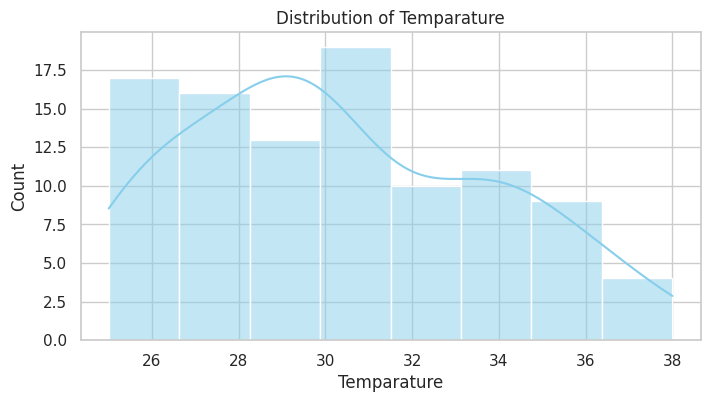

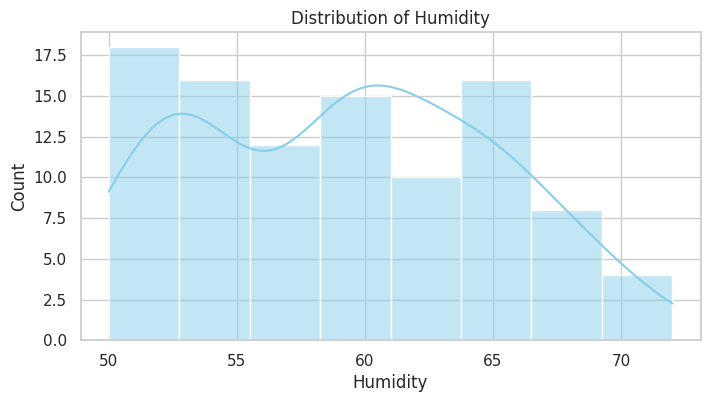

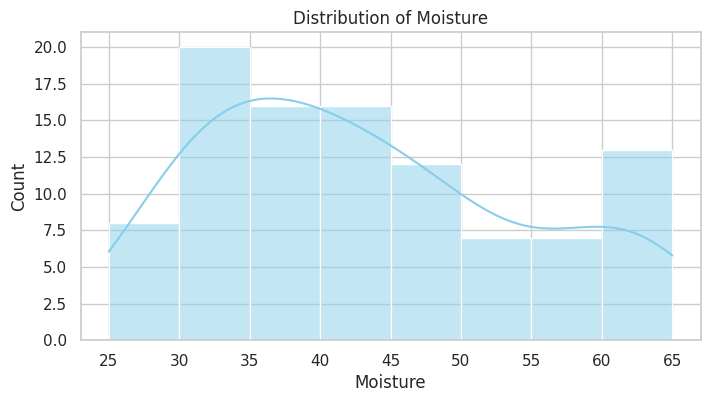

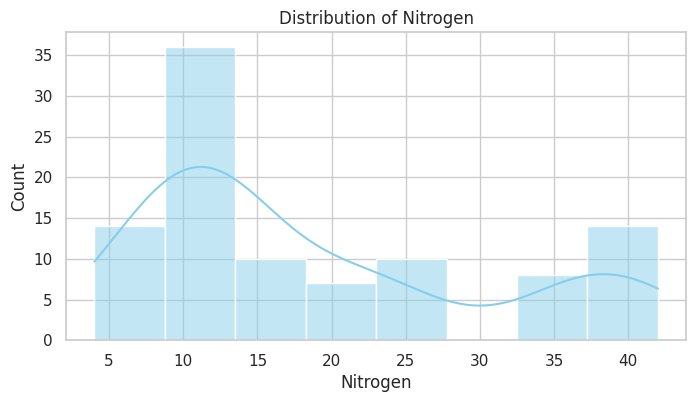

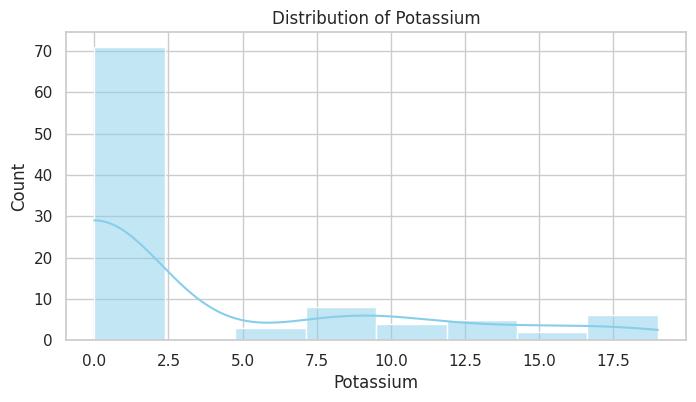

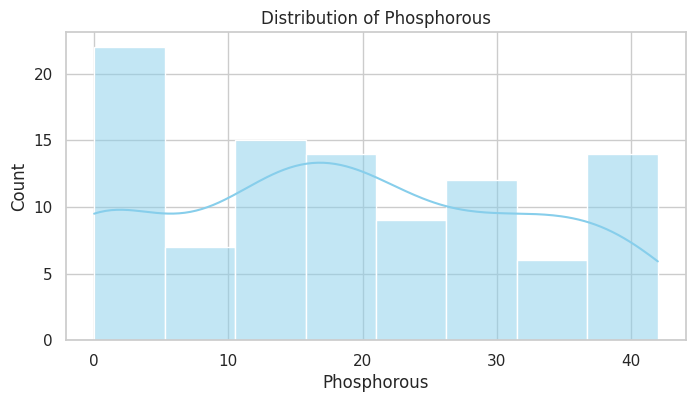

In [ ]:
numeric_columns = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


<ipython-input-28-b2c0de05f165>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


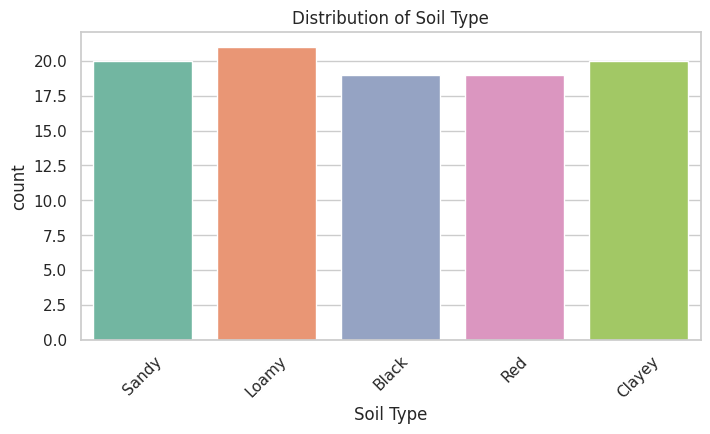

<ipython-input-28-b2c0de05f165>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


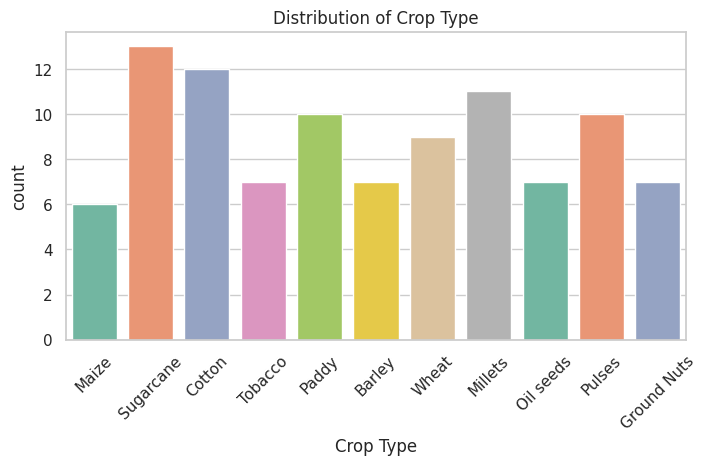

<ipython-input-28-b2c0de05f165>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


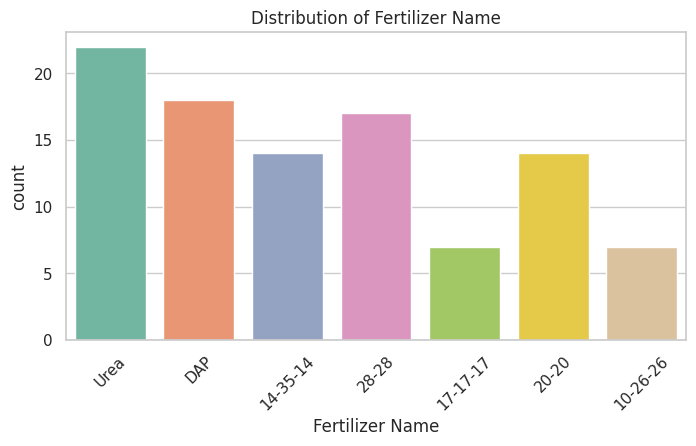

In [ ]:
categorical_columns = ['Soil Type', 'Crop Type', 'Fertilizer Name']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


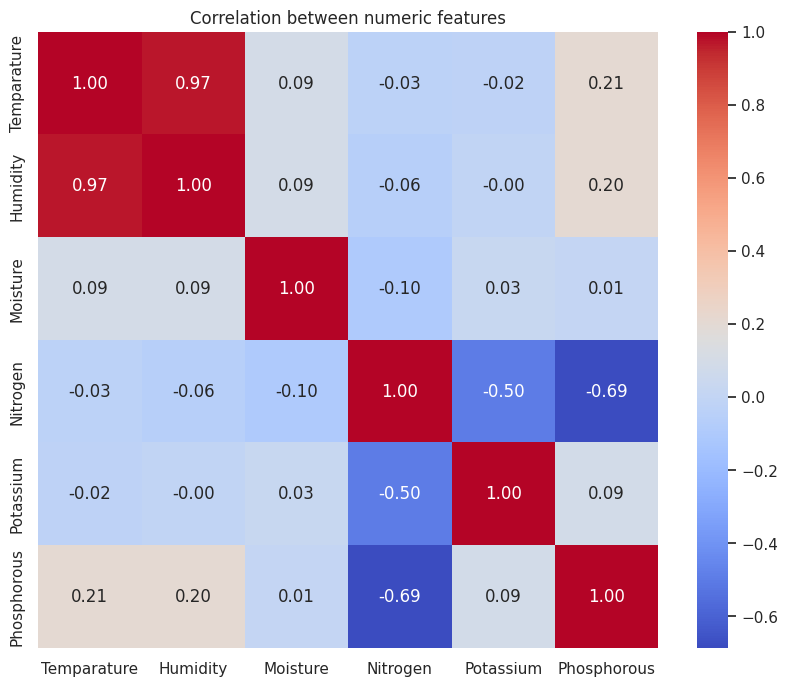

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between numeric features')
plt.show()


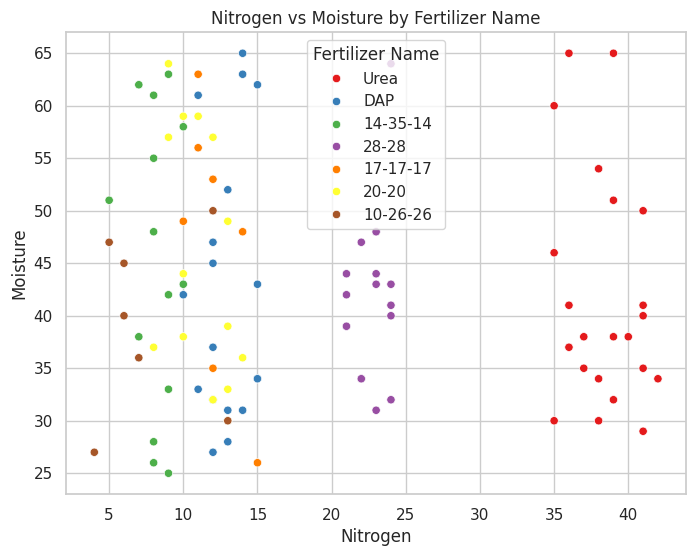

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Nitrogen', y='Moisture', hue='Fertilizer Name', palette='Set1')
plt.title('Nitrogen vs Moisture by Fertilizer Name')
plt.show()


<ipython-input-31-416492471f76>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Fertilizer Name', palette='Set2')


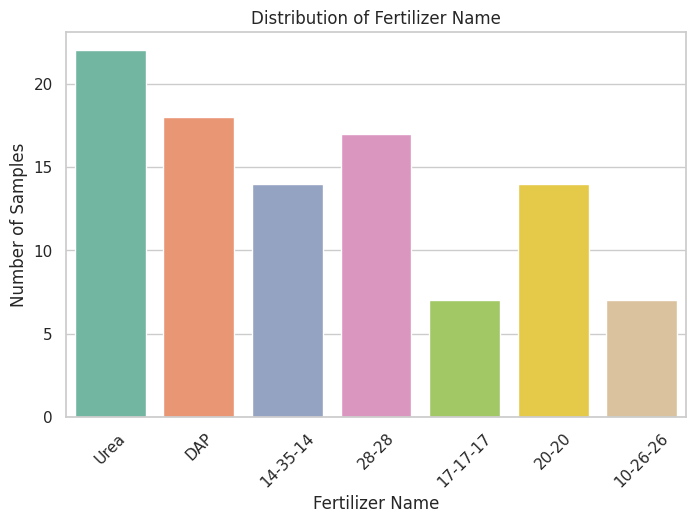

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Fertilizer Name', palette='Set2')
plt.title('Distribution of Fertilizer Name')
plt.xticks(rotation=45)
plt.ylabel('Number of Samples')
plt.show()


In [8]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder
#encoding Soil Type variable
encode_soil = LabelEncoder()
df['Soil Type'] = encode_soil.fit_transform(df['Soil Type'])

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type


,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [9]:
encode_crop =  LabelEncoder()
df['Crop Type'] = encode_crop.fit_transform(df['Crop Type'])

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [10]:
encode_ferti = LabelEncoder()
df['Fertilizer Name'] = encode_ferti.fit_transform(df['Fertilizer Name'])

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


In [11]:
y = df['Fertilizer Name'].copy()
X = df.drop('Fertilizer Name', axis=1).copy()

In [12]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Fertilizer Name',axis=1),df['Fertilizer Name'],test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (79, 8), y_train = (79,), x_test = (20, 8), y_test = (20,)


In [13]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 2 to 37
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  79 non-null     int64
 1   Humidity     79 non-null     int64
 2   Moisture     79 non-null     int64
 3   Soil Type    79 non-null     int64
 4   Crop Type    79 non-null     int64
 5   Nitrogen     79 non-null     int64
 6   Potassium    79 non-null     int64
 7   Phosphorous  79 non-null     int64
dtypes: int64(8)
memory usage: 5.6 KB


In [17]:
rand = RandomForestClassifier(random_state = 42)
rand.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [22]:
pred_rand = rand.predict(x_test)
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, pred_rand)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,8]
}
grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.75      1.00      0.86         3
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.88        20
weighted avg       0.93      0.90      0.88        20

Best score :  0.9748338081671415
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


Confusion Matrix:
[[1 1 1 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 6]]


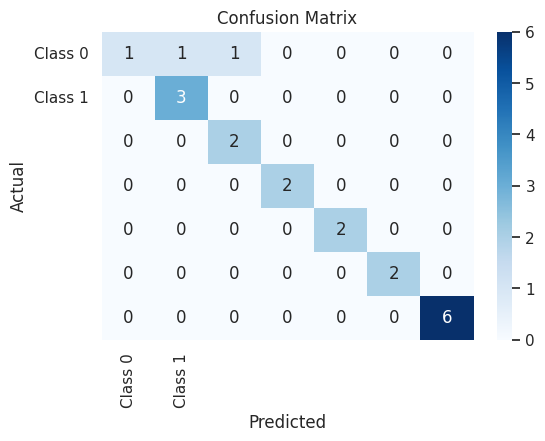

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.75      1.00      0.86         3
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.88        20
weighted avg       0.93      0.90      0.88        20

Best score :  0.9748338081671415
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# After fitting the grid search and making predictions
pred_rand = grid_rand.predict(x_test)

# Print the confusion matrix
cm = confusion_matrix(y_test, pred_rand)
print("Confusion Matrix:")
print(cm)

# Optionally, you can visualize it using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print(classification_report(y_test, pred_rand))

# Best score and parameters
print('Best score : ', grid_rand.best_score_)
print('Best params : ', grid_rand.best_params_)


Feature Importances:
       Feature  Importance
5     Nitrogen    0.306460
7  Phosphorous    0.296957
6    Potassium    0.143008
2     Moisture    0.065011
0  Temparature    0.055152
4    Crop Type    0.052632
1    Humidity     0.047797
3    Soil Type    0.032984


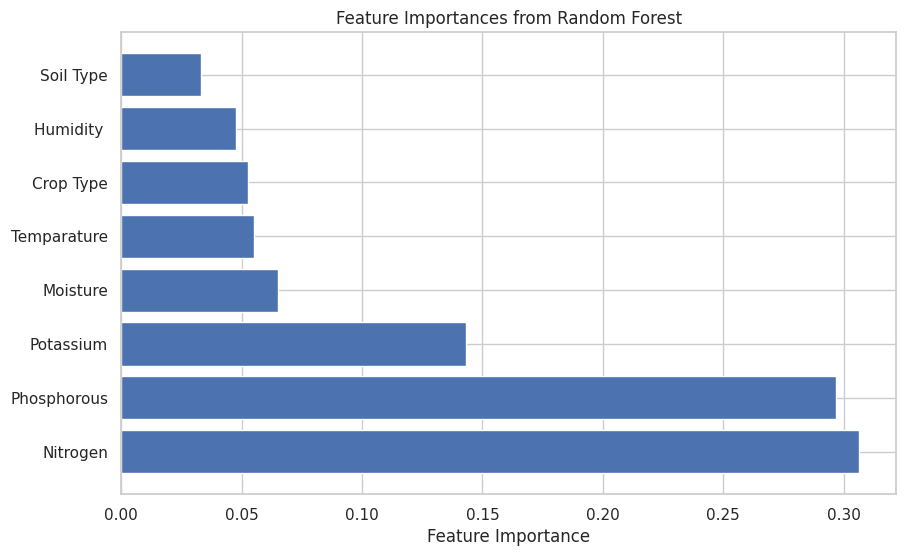

In [ ]:
# Get feature importances
importances = rand.feature_importances_

# Create a DataFrame to hold the feature names and their importance
import pandas as pd
features = x_train.columns  # assuming x_train is a DataFrame with column names
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(feature_importance_df)

# Optionally, plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

In [24]:
#pickling the file
import pickle
pickle_out = open('fertilizer.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [35]:
import pandas as pd
import pickle

# 1. Load your trained model
model = pickle.load(open('fertilizer.pkl','rb'))

# 2. Load your fertilizer information from the CSV
fertilizer_info = pd.read_csv('/content/fertilizer_instructions.csv')  # change to your CSV filename

# 3. Predict
#ans = model.predict([[34,65,62,0,1,7,9,30]])
ans = model.predict([[45, 70, 60, 0, 0, 8, 5, 35]])

# 4. Get the fertilizer name based on the prediction
fertilizer_mapping = {
    0: "10-26-26",
    1: "14-35-14",
    2: "17-17-17",
    3: "20-20",
    4: "28-28",
    5: "DAP",
    6: "Urea"
}

predicted_fertilizer = fertilizer_mapping[ans[0]]

# 5. Find the full information for the predicted fertilizer
row = fertilizer_info[fertilizer_info['Fertilizer Name'].str.replace('/', '-').str.strip() == predicted_fertilizer]

if not row.empty:
    # Extract details from the CSV
    description = row.iloc[0]['Description']
    best_used_for = row.iloc[0]['Best Used For']
    application = row.iloc[0]['Application']

    # Print the formatted results
    print(f"\n🌿 **Recommended Fertilizer:** {predicted_fertilizer}\n")
    print("---------------------------------------------------------")
    print(f"🔍 **Description:**\n{description}\n")
    print(f"🌱 **Best Used For:**\n{best_used_for}\n")
    print(f"💡 **Application:**\n{application}\n")
    print("---------------------------------------------------------")
else:
    print("⚠️ Fertilizer information not found in the CSV.")


🌿 **Recommended Fertilizer:** DAP

---------------------------------------------------------
🔍 **Description:**
High in phosphorous, essential for root development.

🌱 **Best Used For:**
Sugarcane, Tobacco, Ground Nuts

💡 **Application:**
Apply at planting time to support root and early plant growth.

---------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
